In [23]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.python.keras.layers import Input, Dense, Flatten, Lambda, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [24]:
# function load data and label 
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (32, 32))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [25]:
train_dir = "./Images"

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(train_dir)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

Total number of symbols:  26
Number of training images:  3358
Number of testing images:  840


In [26]:
def get_label(arg):
    match arg:
        case 0:
            return "A"
        case 1:
            return "B"
        case 2:
            return "C"
        case 3:
            return "D"
        case 4:
            return "E"
        case 5:
            return "F"
        case 6:
            return "G"
        case 7:
            return "H"
        case 8:
            return "I"
        case 9:
            return "J"
        case 10:
            return "K"
        case 11:
            return "L"
        case 12:
            return "M"
        case 13:
            return "N"
        case 14:
            return "O"
        case 15:
            return "P"
        case 16:
            return "Q"
        case 17:
            return "R"
        case 18:
            return "S"
        case 19:
            return "T"
        case 20:
            return "U"
        case 21:
            return "V"
        case 22:
            return "W"
        case 23:
            return "X"
        case 24:
            return "Y"
        case 25:
            return "Z"

test ảnh index = 3099
onhot vector
Y


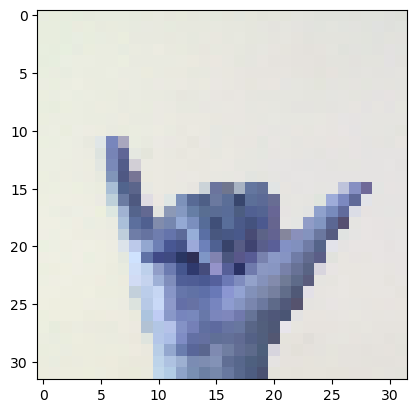

In [27]:
x = random.randint(0,X_train.shape[0])
# x=1
print("test ảnh index = {}".format(x))
print("onhot vector")
print(get_label(y_train[x]))
plt.imshow(X_train[x], cmap='gray')
plt.show()

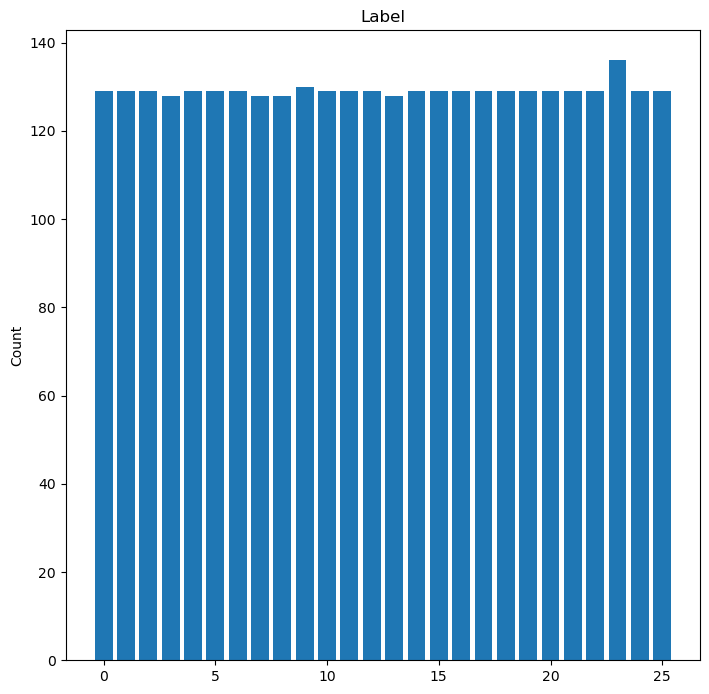

In [28]:
# visualization 

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i])

uniq, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
ax1.set_ylabel('Count')
ax1.set_title('Label')

plt.bar(uniq, counts)
# addlabels(uniq, counts)

plt.show()

In [29]:

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    precision_f = precision(y_true, y_pred)
    recall_f = recall(y_true, y_pred)
    return 2*((precision_f*recall_f)/(precision_f+recall_f+K.epsilon()))

In [46]:
def cnn_model():
#     model=Sequential()
#     model.add(Conv2D(128,kernel_size=(5,5),
#                      strides=1,padding='same',activation='relu',input_shape=(32,32,3)))
#     model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
#     model.add(Conv2D(64,kernel_size=(2,2),
#                     strides=1,activation='relu',padding='same'))
#     model.add(MaxPool2D((2,2),2,padding='same'))
#     model.add(Conv2D(32,kernel_size=(2,2),
#                     strides=1,activation='relu',padding='same'))
#     model.add(MaxPool2D((2,2),2,padding='same'))

#     model.add(Flatten())
    
#     model.add(Dense(units=512,activation='relu'))
#     model.add(Dropout(rate=0.25))
#     model.add(Dense(units=26,activation='softmax'))
    model = Sequential()
    model.add(Conv2D(32, 2, activation='relu', input_shape=(32,32,3)))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, 2, activation='relu'))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, 2, activation='relu'))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(26, activation='softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics = ['accuracy',f1, precision,recall])
    
    return model


In [47]:
cnn_model = cnn_model()
print(cnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 31, 31, 32)        416       
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 64)        8256      
                                                      

In [32]:
y_train = to_categorical(y_train, 26).astype(np.uint8)
y_test_b = to_categorical(y_test, 26).astype(np.uint8)

In [48]:
history = cnn_model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (X_test, y_test_b))

Epoch 1/10
27/27 [==============================] - 5s 141ms/step - loss: 5.9392 - accuracy: 0.0381 - f1: 0.0056 - precision: 0.0100 - recall: 0.0046 - val_loss: 3.2597 - val_accuracy: 0.0536 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 3s 118ms/step - loss: 3.2550 - accuracy: 0.0396 - f1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.2575 - val_accuracy: 0.0238 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 3s 121ms/step - loss: 3.2489 - accuracy: 0.0420 - f1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.2484 - val_accuracy: 0.0738 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 3s 119ms/step - loss: 3.2292 - accuracy: 0.0462 - f1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.20

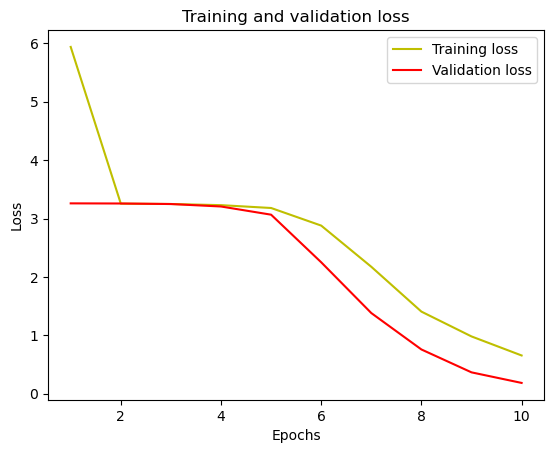

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

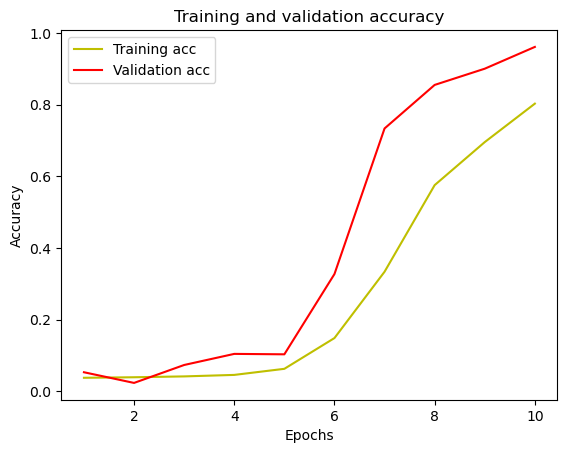

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
cnn_model.save('cnn_model0.h5')

In [52]:

prediction = cnn_model.predict(X_test) 

27/27 [==============================] - 0s 8ms/step


Predicted Label:  Z
True Label:  Z


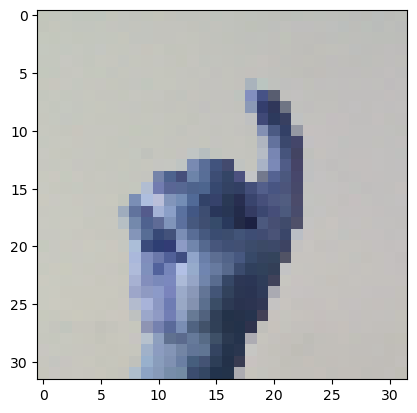

In [53]:
classes = np.argmax(prediction,axis=1)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i]) 
print("Predicted Label: ", get_label(classes[i]))
print("True Label: ", get_label(y_test[i]))

In [54]:
accuracy = accuracy_score(y_test, classes)
print('Accuracy Score = ', accuracy*100, "%")

Accuracy Score =  96.07142857142857 %


In [56]:
pred =  cnn_model.evaluate(X_test, y_test_b)
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

27/27 [==============================] - 0s 9ms/step - loss: 0.1845 - accuracy: 0.9607 - f1: 0.9609 - precision: 0.9773 - recall: 0.9456
Loss = 0.18448953330516815
Test Accuracy = 0.9607142806053162


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test,classes,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32
           2       1.00      0.94      0.97        32
           3       0.93      0.79      0.85        33
           4       0.84      0.97      0.90        32
           5       1.00      0.97      0.98        32
           6       0.97      1.00      0.98        32
           7       1.00      0.97      0.98        33
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        33
          10       0.94      1.00      0.97        32
          11       1.00      1.00      1.00        32
          12       0.94      0.94      0.94        32
          13       1.00      0.97      0.98        33
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        32
          17       0.76    